# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [8]:
pip install pil

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


SyntaxError: invalid syntax (3018113969.py, line 7)

In [9]:
ruta_train = r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_train"
ruta_test =r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_test"


import os
from PIL import Image
import numpy as np



# Tamaño de reshape de las imágenes
tamanio_reshape = (32, 32)

def cargar_imagenes_etiquetas(ruta):
    imagenes = []
    etiquetas = []
    for carpeta in os.listdir(ruta):
        ruta_carpeta = os.path.join(ruta, carpeta)
        if os.path.isdir(ruta_carpeta):
            for archivo in os.listdir(ruta_carpeta):
                ruta_imagen = os.path.join(ruta_carpeta, archivo)
                if os.path.isfile(ruta_imagen):
                    try:
                        imagen = Image.open(ruta_imagen)
                        imagen = imagen.resize(tamanio_reshape)
                        imagen = np.array(imagen)
                        imagenes.append(imagen)
                        etiquetas.append(carpeta)
                    except (IOError, OSError):
                        print(f"No se pudo cargar la imagen: {ruta_imagen}")
    return imagenes, etiquetas

# Cargar imágenes y etiquetas del conjunto de entrenamiento
imagenes_train, etiquetas_train = cargar_imagenes_etiquetas(ruta_train)

# Cargar imágenes y etiquetas del conjunto de prueba
imagenes_test, etiquetas_test = cargar_imagenes_etiquetas(ruta_test)

# Convertir las listas de imágenes y etiquetas a arreglos numpy
imagenes_train = np.array(imagenes_train)
etiquetas_train = np.array(etiquetas_train)
imagenes_test = np.array(imagenes_test)
etiquetas_test = np.array(etiquetas_test)

# Verificar las dimensiones de los arreglos resultantes
print("Dimensiones de las imágenes de entrenamiento:", imagenes_train.shape)
print("Dimensiones de las etiquetas de entrenamiento:", etiquetas_train.shape)
print("Dimensiones de las imágenes de prueba:", imagenes_test.shape)
print("Dimensiones de las etiquetas de prueba:", etiquetas_test.shape)


Dimensiones de las imágenes de entrenamiento: (14034, 32, 32, 3)
Dimensiones de las etiquetas de entrenamiento: (14034,)
Dimensiones de las imágenes de prueba: (3000, 32, 32, 3)
Dimensiones de las etiquetas de prueba: (3000,)


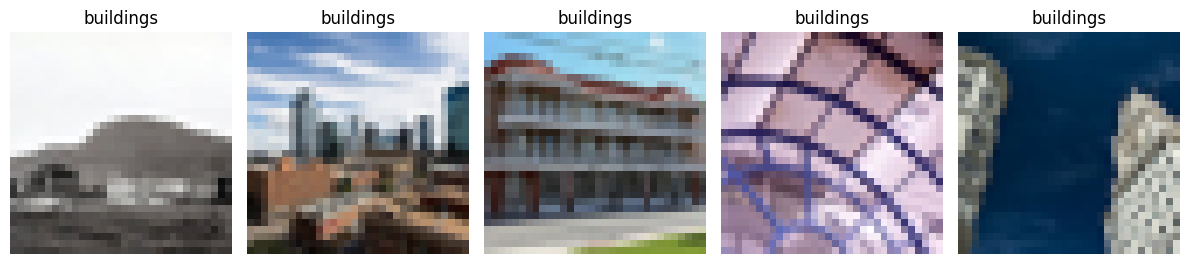

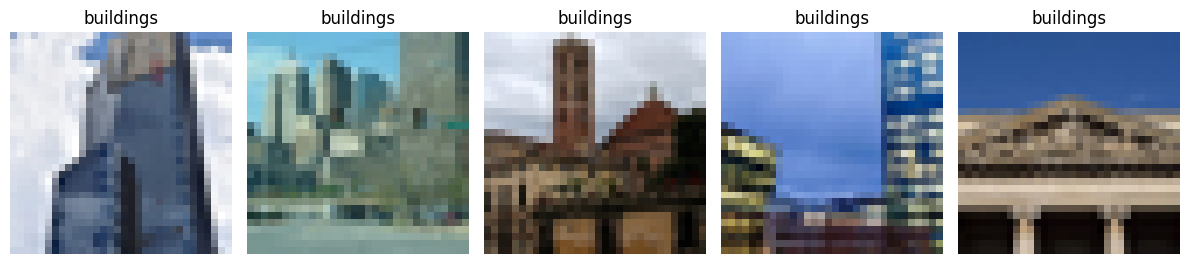

In [10]:
import matplotlib.pyplot as plt

# Función para mostrar imágenes de muestra
def mostrar_muestras(imagenes, etiquetas, num_muestras=5):
    fig, axs = plt.subplots(1, num_muestras, figsize=(12, 6))
    for i in range(num_muestras):
        axs[i].imshow(imagenes[i])
        axs[i].axis('off')
        axs[i].set_title(etiquetas[i])
    plt.tight_layout()
    plt.show()

# Mostrar muestras del conjunto de entrenamiento
mostrar_muestras(imagenes_train, etiquetas_train)

# Mostrar muestras del conjunto de prueba
mostrar_muestras(imagenes_test, etiquetas_test)


In [11]:
imagenes_train = imagenes_train.astype('float32') / 255.0
imagenes_test = imagenes_test.astype('float32') / 255.0

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

# Dimensiones de entrada de las imágenes
input_shape = (32, 32, 3)  # Considerando imágenes en color (RGB)

# Crear el modelo de la CNN
modelo = tf.keras.Sequential()

# Capa convolucional 1
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 2
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 3
modelo.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa de aplanamiento
modelo.add(layers.Flatten())

# Capa completamente conectada 1
modelo.add(layers.Dense(64, activation='relu'))

# Capa de salida
modelo.add(layers.Dense(6, activation='softmax'))

# Imprimir el resumen del modelo
modelo.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [29]:
from sklearn.model_selection import train_test_split

# Dividir los datos de entrenamiento en entrenamiento y validación
imagenes_entrenamiento, imagenes_validacion, etiquetas_entrenamiento, etiquetas_validacion = train_test_split(
    imagenes_train, etiquetas_train, test_size=0.2, random_state=42)

In [30]:
print("Dimensiones de las imágenes de entrenamiento:", imagenes_entrenamiento.shape)
print("Dimensiones de las etiquetas de entrenamiento:", etiquetas_entrenamiento.shape)
print("Dimensiones de las imágenes de validación:", imagenes_validacion.shape)
print("Dimensiones de las etiquetas de validación:", etiquetas_validacion.shape)

Dimensiones de las imágenes de entrenamiento: (11227, 32, 32, 3)
Dimensiones de las etiquetas de entrenamiento: (11227,)
Dimensiones de las imágenes de validación: (2807, 32, 32, 3)
Dimensiones de las etiquetas de validación: (2807,)


In [31]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
history = modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=10, validation_data=(imagenes_validacion, etiquetas_validacion))


Epoch 1/10


ValueError: in user code:

    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [32]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Obtener las métricas de precisión y pérdida del objeto history
    precision = history.history['accuracy']
    perdida = history.history['loss']

    # Crear gráfico
    epochs = range(1, len(precision) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, precision, 'r', label='Precisión')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, perdida, 'b', label='Pérdida')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Utilizar la función plot_history para representar el objeto history
plot_history(history)


NameError: name 'history' is not defined